In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
import seaborn as sns

In [4]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 

In [5]:
import warnings  
warnings.filterwarnings('ignore')

In [6]:
from scipy import stats
import numpy as np

In [8]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
print (train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [12]:
## Overview of the data set 

In [13]:
print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [14]:
## From above output we can see that train and test data set consits of some missing Values


In [15]:
## Missing Value In terms of Percentage for train data set

Missing_Value_Train = train.isnull().sum().sort_values(ascending = False)
percentage_Train = round(train.isnull().sum().sort_values(ascending = False)/len(train)*100, 2)

## Missing Value In terms of Percentage for Test data set

Missing_Value_Test = test.isnull().sum().sort_values(ascending = False)
percentage_Test = round(test.isnull().sum().sort_values(ascending = False)/len(test)*100, 2)

pd.concat([Missing_Value_Train, percentage_Train,Missing_Value_Test, percentage_Test], axis = 1,keys= ["Missing_Value_Train"," percentage","Missing_Value_Test", "percentage_Test"])


,Missing_Value_Train,percentage,Missing_Value_Test,percentage_Test
Age,177,19.87,86.0,20.57
Cabin,687,77.10,327.0,78.23
Embarked,2,0.22,0.0,0.00
Fare,0,0.00,1.0,0.24
Name,0,0.00,0.0,0.00
Parch,0,0.00,0.0,0.00
PassengerId,0,0.00,0.0,0.00
Pclass,0,0.00,0.0,0.00
Sex,0,0.00,0.0,0.00
SibSp,0,0.00,0.0,0.00


In [16]:
## Now we go for the Graphical View 
## so that we can understand which aspect of the data set is important for Survival 

In [17]:
## Visualization and Feature Relations

In [18]:
# 1) Gender Vs Surived 

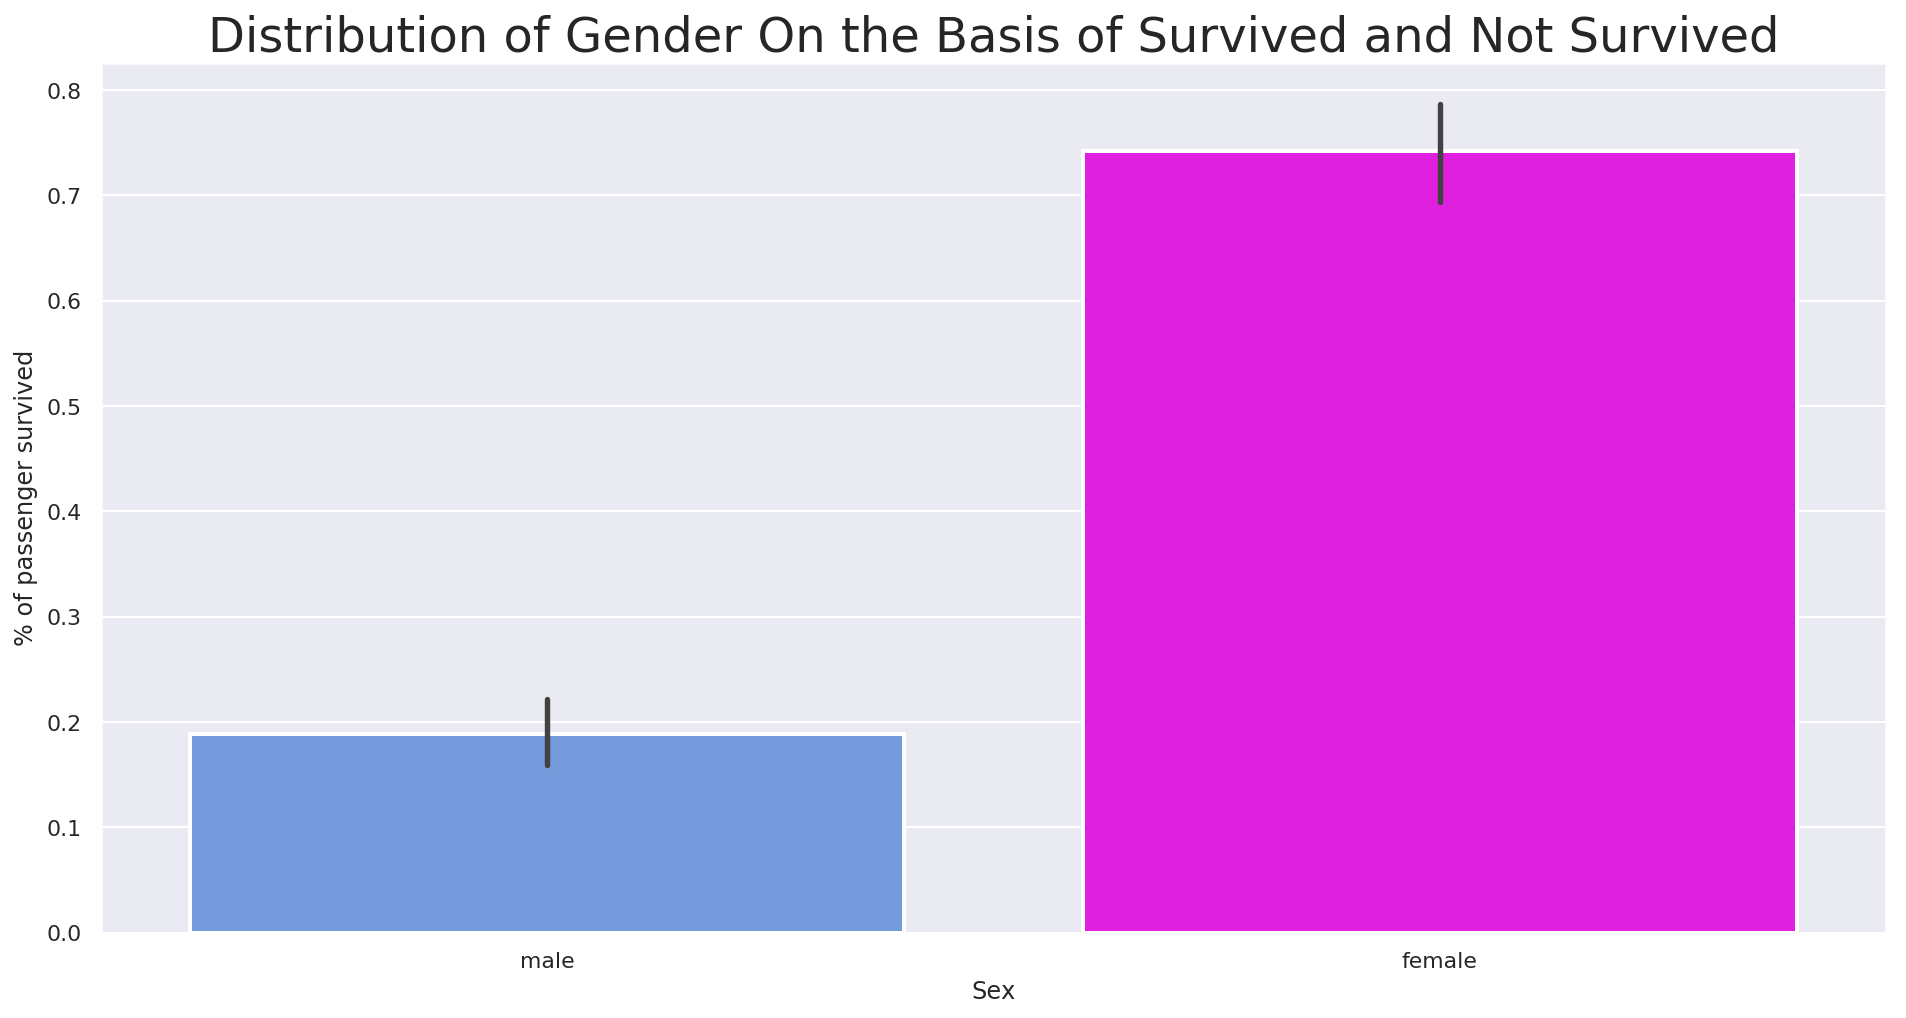

In [19]:
pal = {'female':"fuchsia",'male':"cornflowerblue" }
sns.set(style="darkgrid")
plt.subplots(figsize = (16,8))
ax = sns.barplot(x = "Sex", 
            y = "Survived", 
            data=train, 
            palette = pal,
            linewidth=2 )
plt.title("Distribution of Gender On the Basis of Survived and Not Survived", fontsize = 24)
plt.ylabel("% of passenger survived", fontsize = 12)
plt.xlabel("Sex",fontsize = 12);

In [20]:
## As from Above Graph we can  see that Incompare of Male Female were More survived
## From Here we conculed that Sex is a impoertant parameter of survival
## Now we Visulaizte that How Many men surived or Female survived 

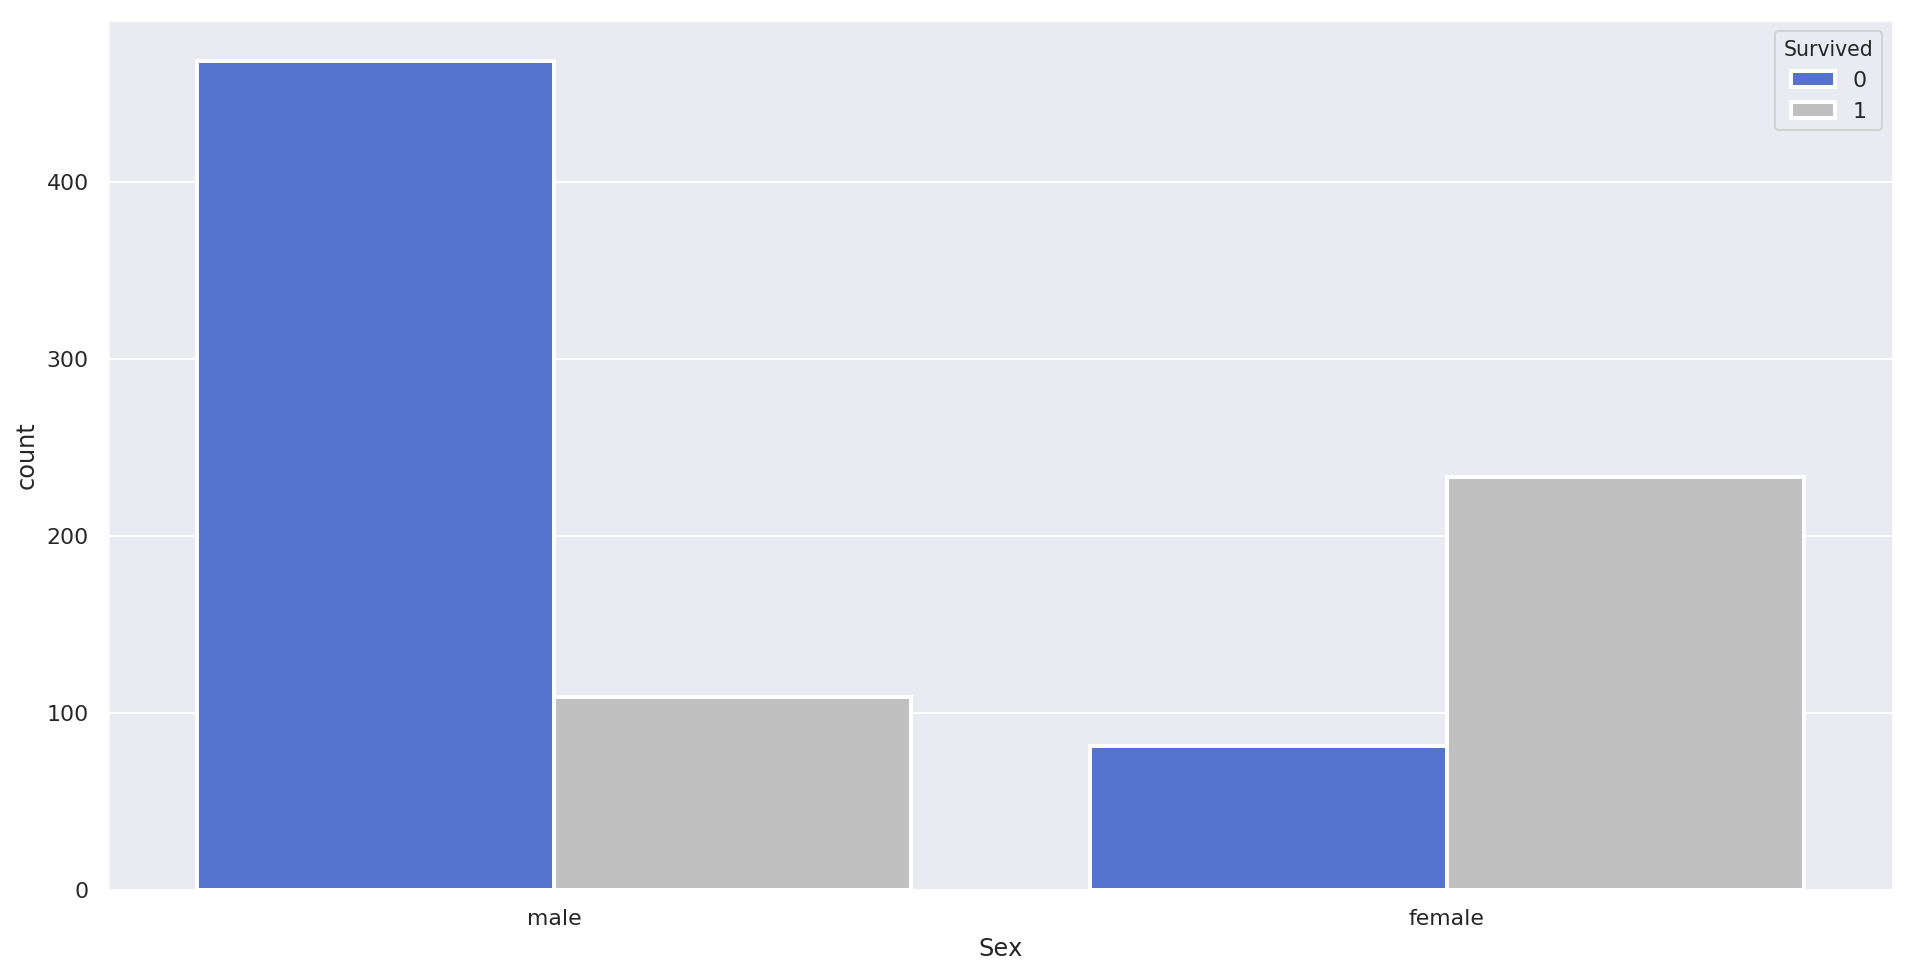

In [21]:
pal = {1:"silver", 0:"royalblue"}
sns.set(style="darkgrid")
plt.subplots(figsize = (16,8))
ax = sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=2, 
                   palette = pal
)

In [22]:
## From above graph we can see that Survival of Male is less out of total male 
## and survival of female is more in compare of total Female


In [23]:
## Now we Can Visualiza Which Age group is Survided More 

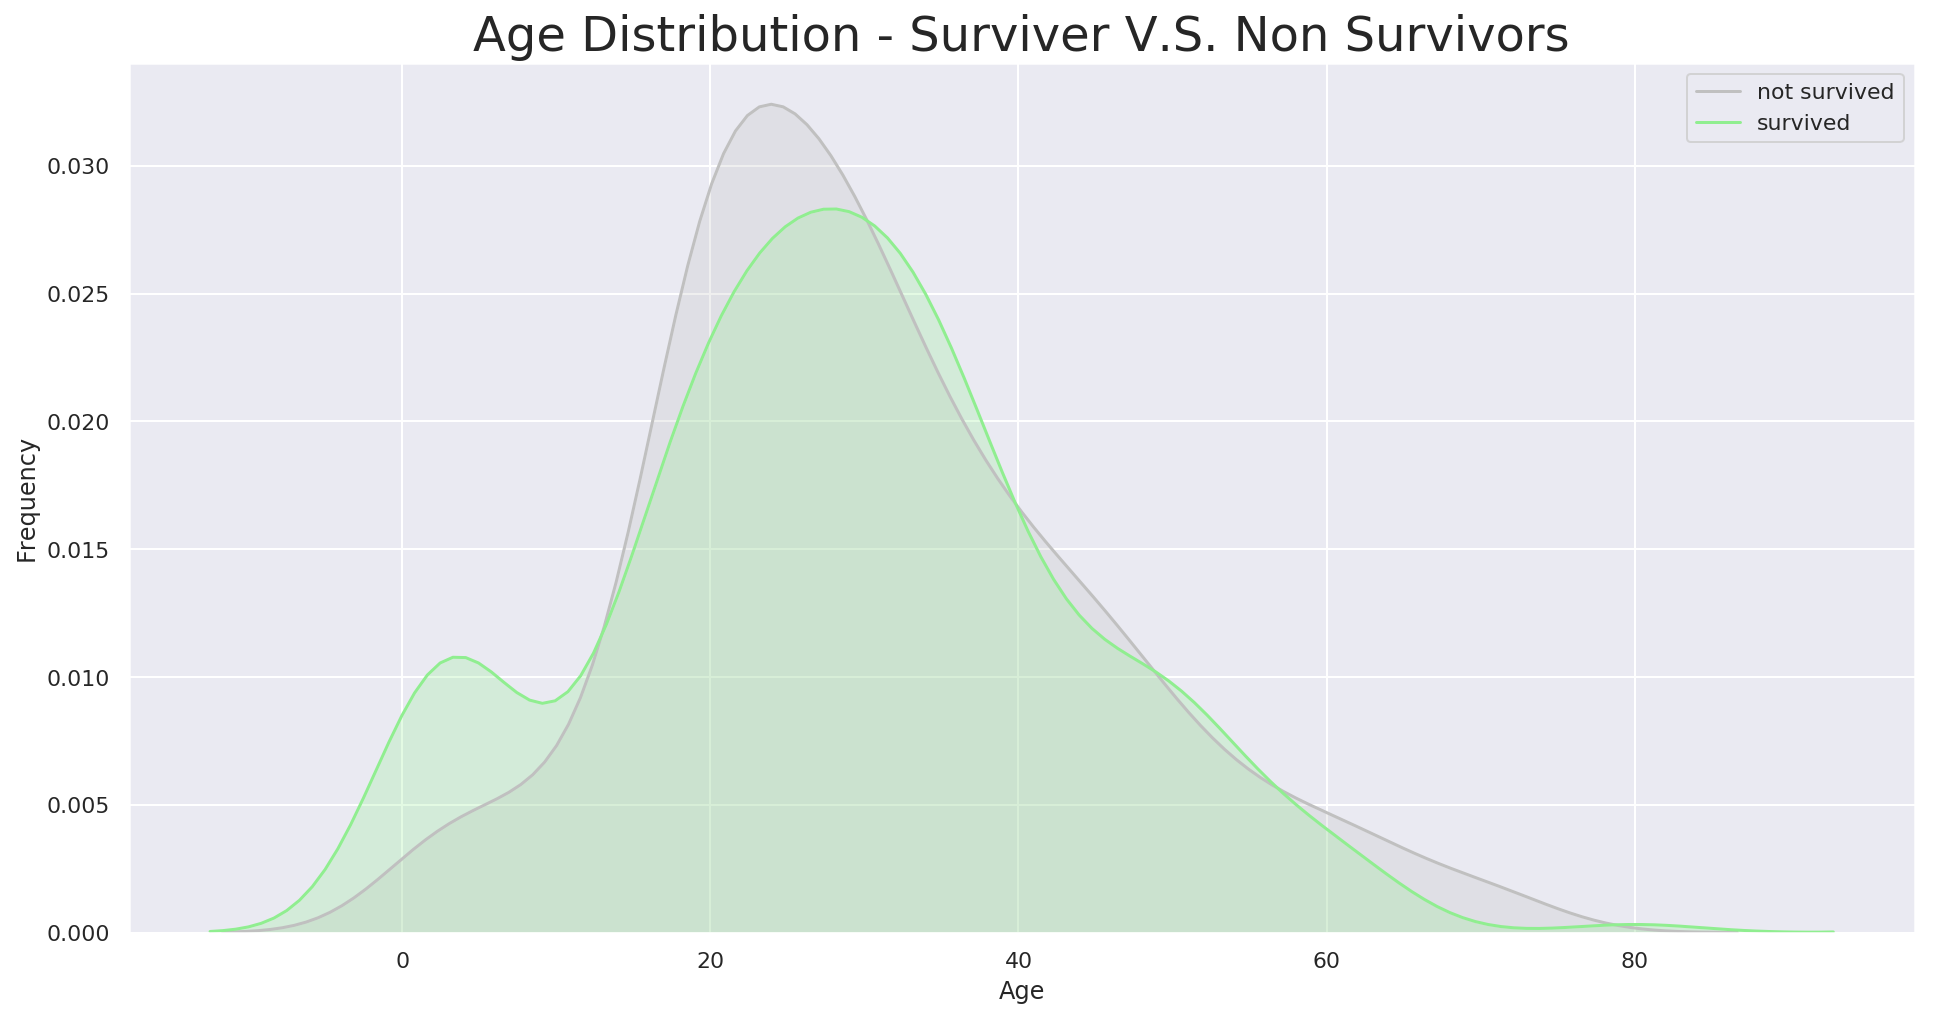

In [24]:
# Kernel Density Plot
fig = plt.figure(figsize=(16,8),)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='Silver',shade=True,label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='lightgreen',shade=True, label='survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 24)
plt.xlabel("Age", fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);


In [25]:
## From Here it is clear that childern and infant are Safed More Compare to others

In [26]:
## From above graph we can see that Age range lises Below Zero 

In [27]:
## Let have a look on age data set 

In [28]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [29]:
## From above Statistic We can see that Age Has Min Value Of 0.17 and Max Value Of 80 

In [30]:
## Let have a quick Look on Age Data 
train.loc[train['Age'] < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [31]:
## We have to take care of it at the time of preprocessing of data set that age value have values in floats 

In [32]:
## Now we Should Visulatize which age group Survived More on the basis of gender also 

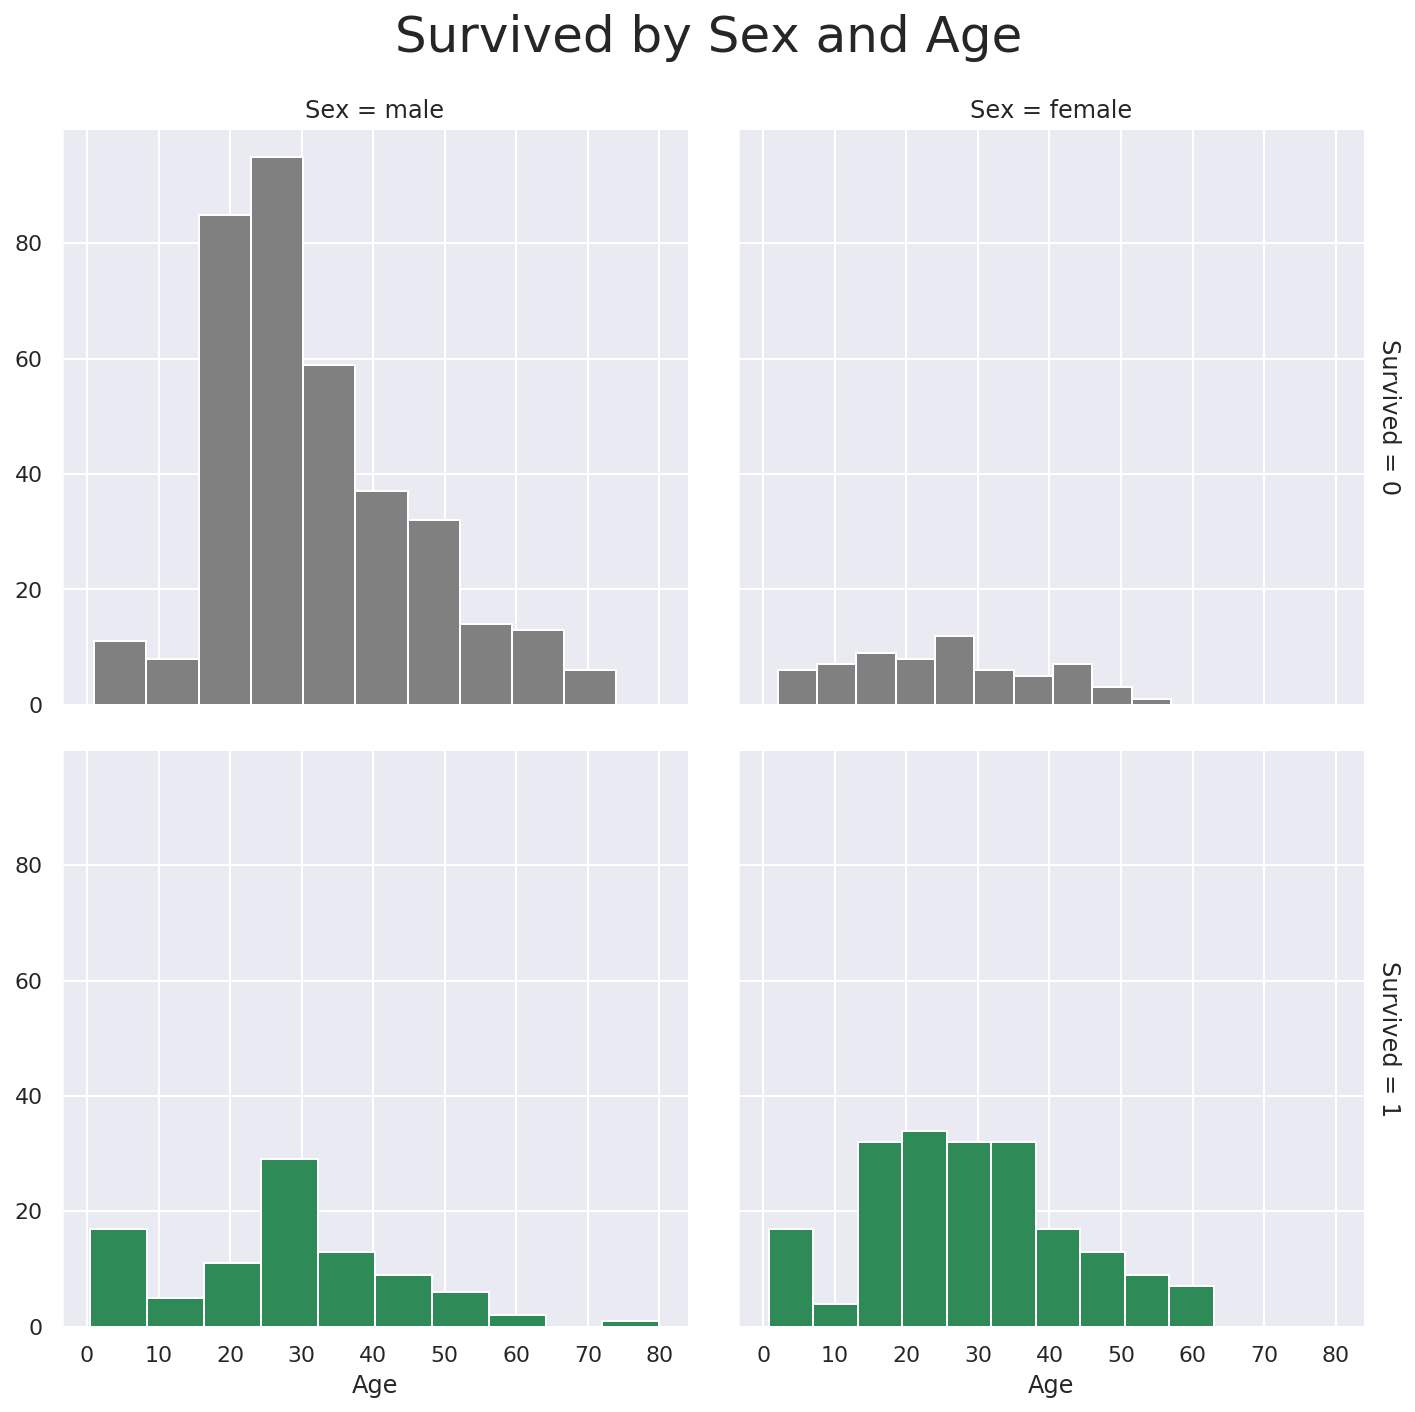

In [33]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

In [34]:
## From Above graph we can see that Mid Age Male Sacrafies More to save infant , childern and womens 
## And we can also see that in Male and female people more than age 70 in men are fully survived and female
## more than age 55 are fully surived 

In [35]:
## let understand this by Visulatize On the basis of Pclass

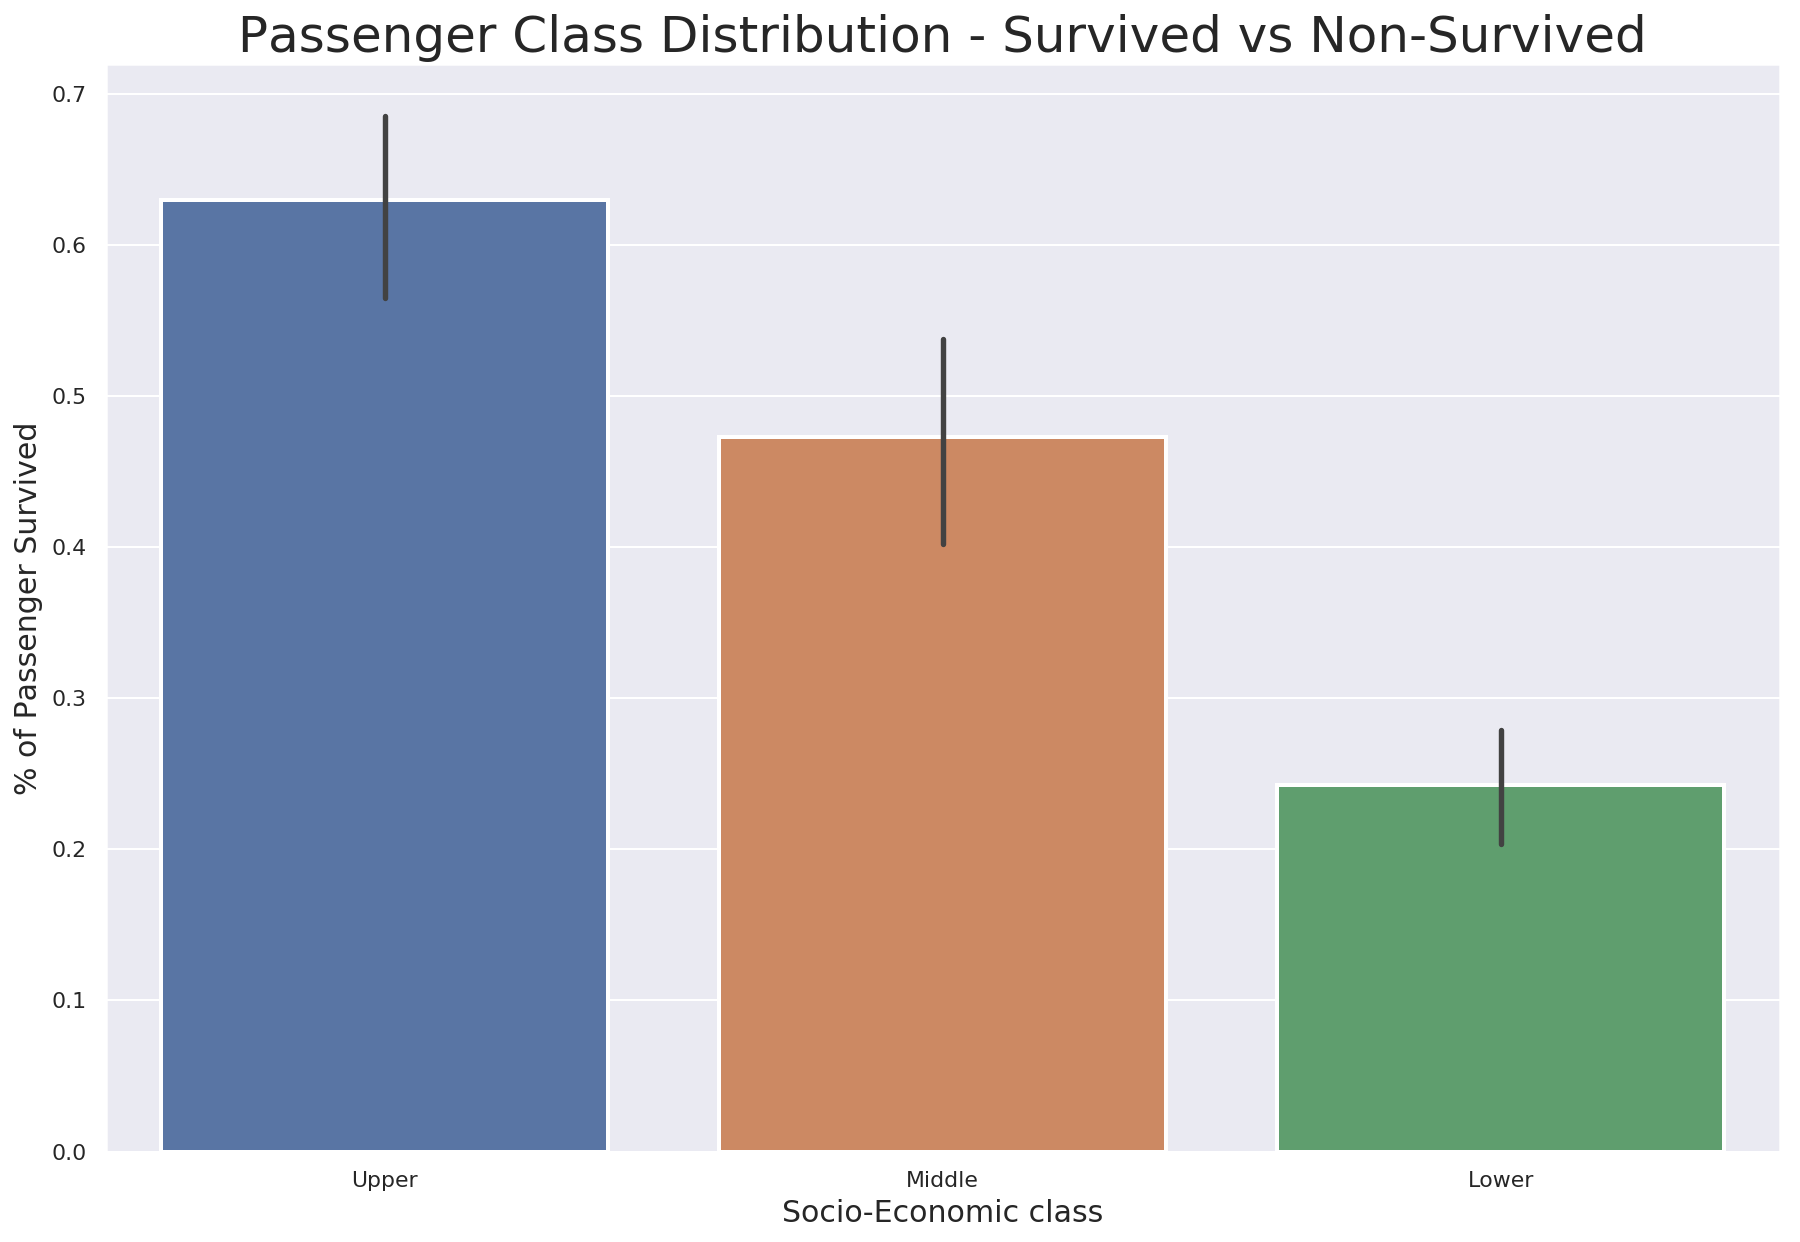

In [36]:
plt.subplots(figsize = (15,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            data=train, 
            linewidth=2)
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 25)
plt.xlabel("Socio-Economic class", fontsize = 15);
plt.ylabel("% of Passenger Survived", fontsize = 15);
labels = ['Upper', 'Middle', 'Lower']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val, labels);


In [37]:
## From Here we can seen that people who are Ecomonial strong have Surivevd More

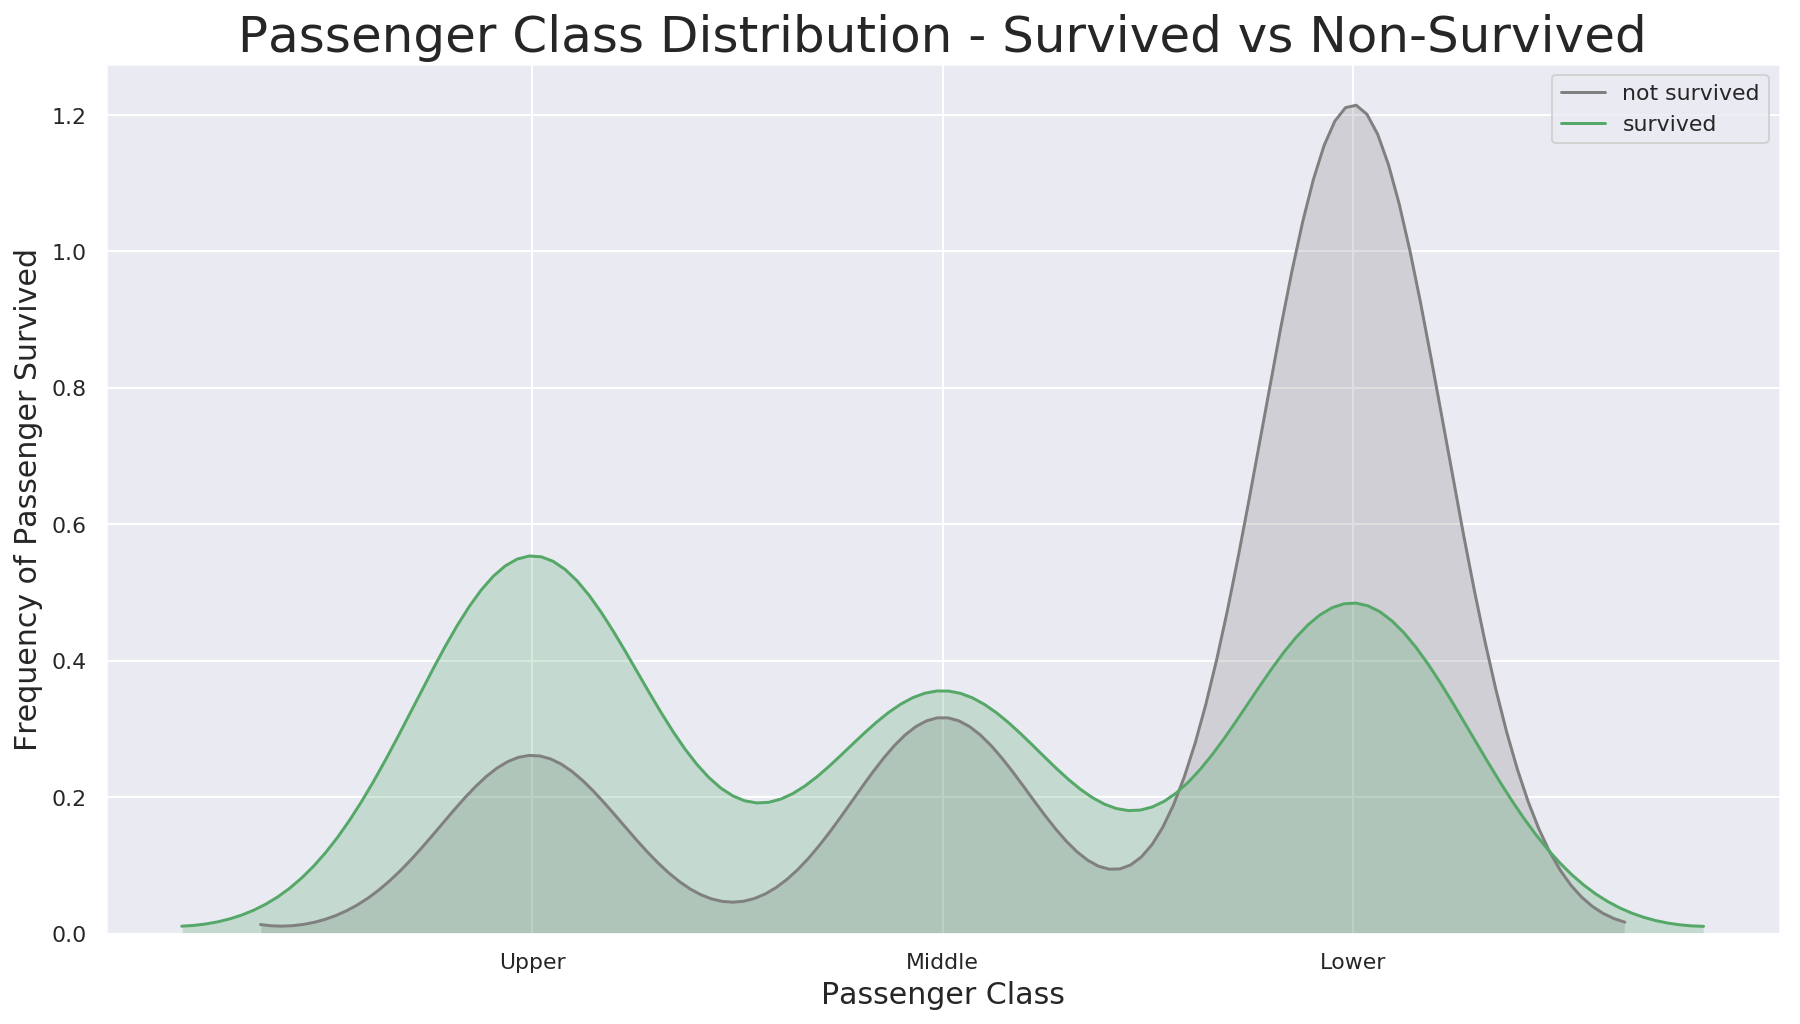

In [38]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
## I have included to different ways to code a plot below, choose the one that suites you. 
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='gray',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived')
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 15)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

In [39]:
## From Here it is clear that People Have Economial strong Survived More 

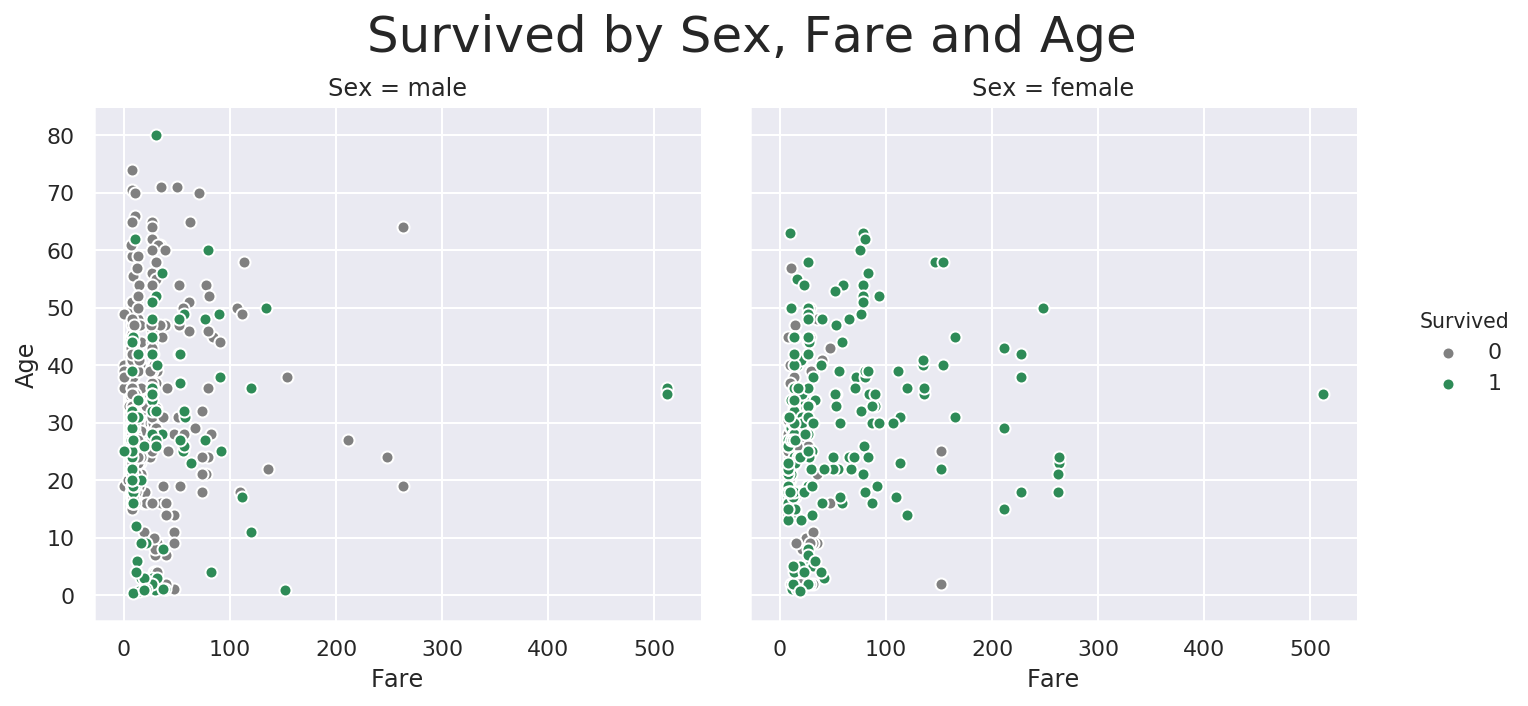

In [40]:
g = sns.FacetGrid(train, size=5,hue="Survived", col ="Sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

In [41]:
## From here it is that Mid age Men gives there scarefies for the survial of others

In [42]:
## Lastly we Can Visulatize on the basis of Embarked

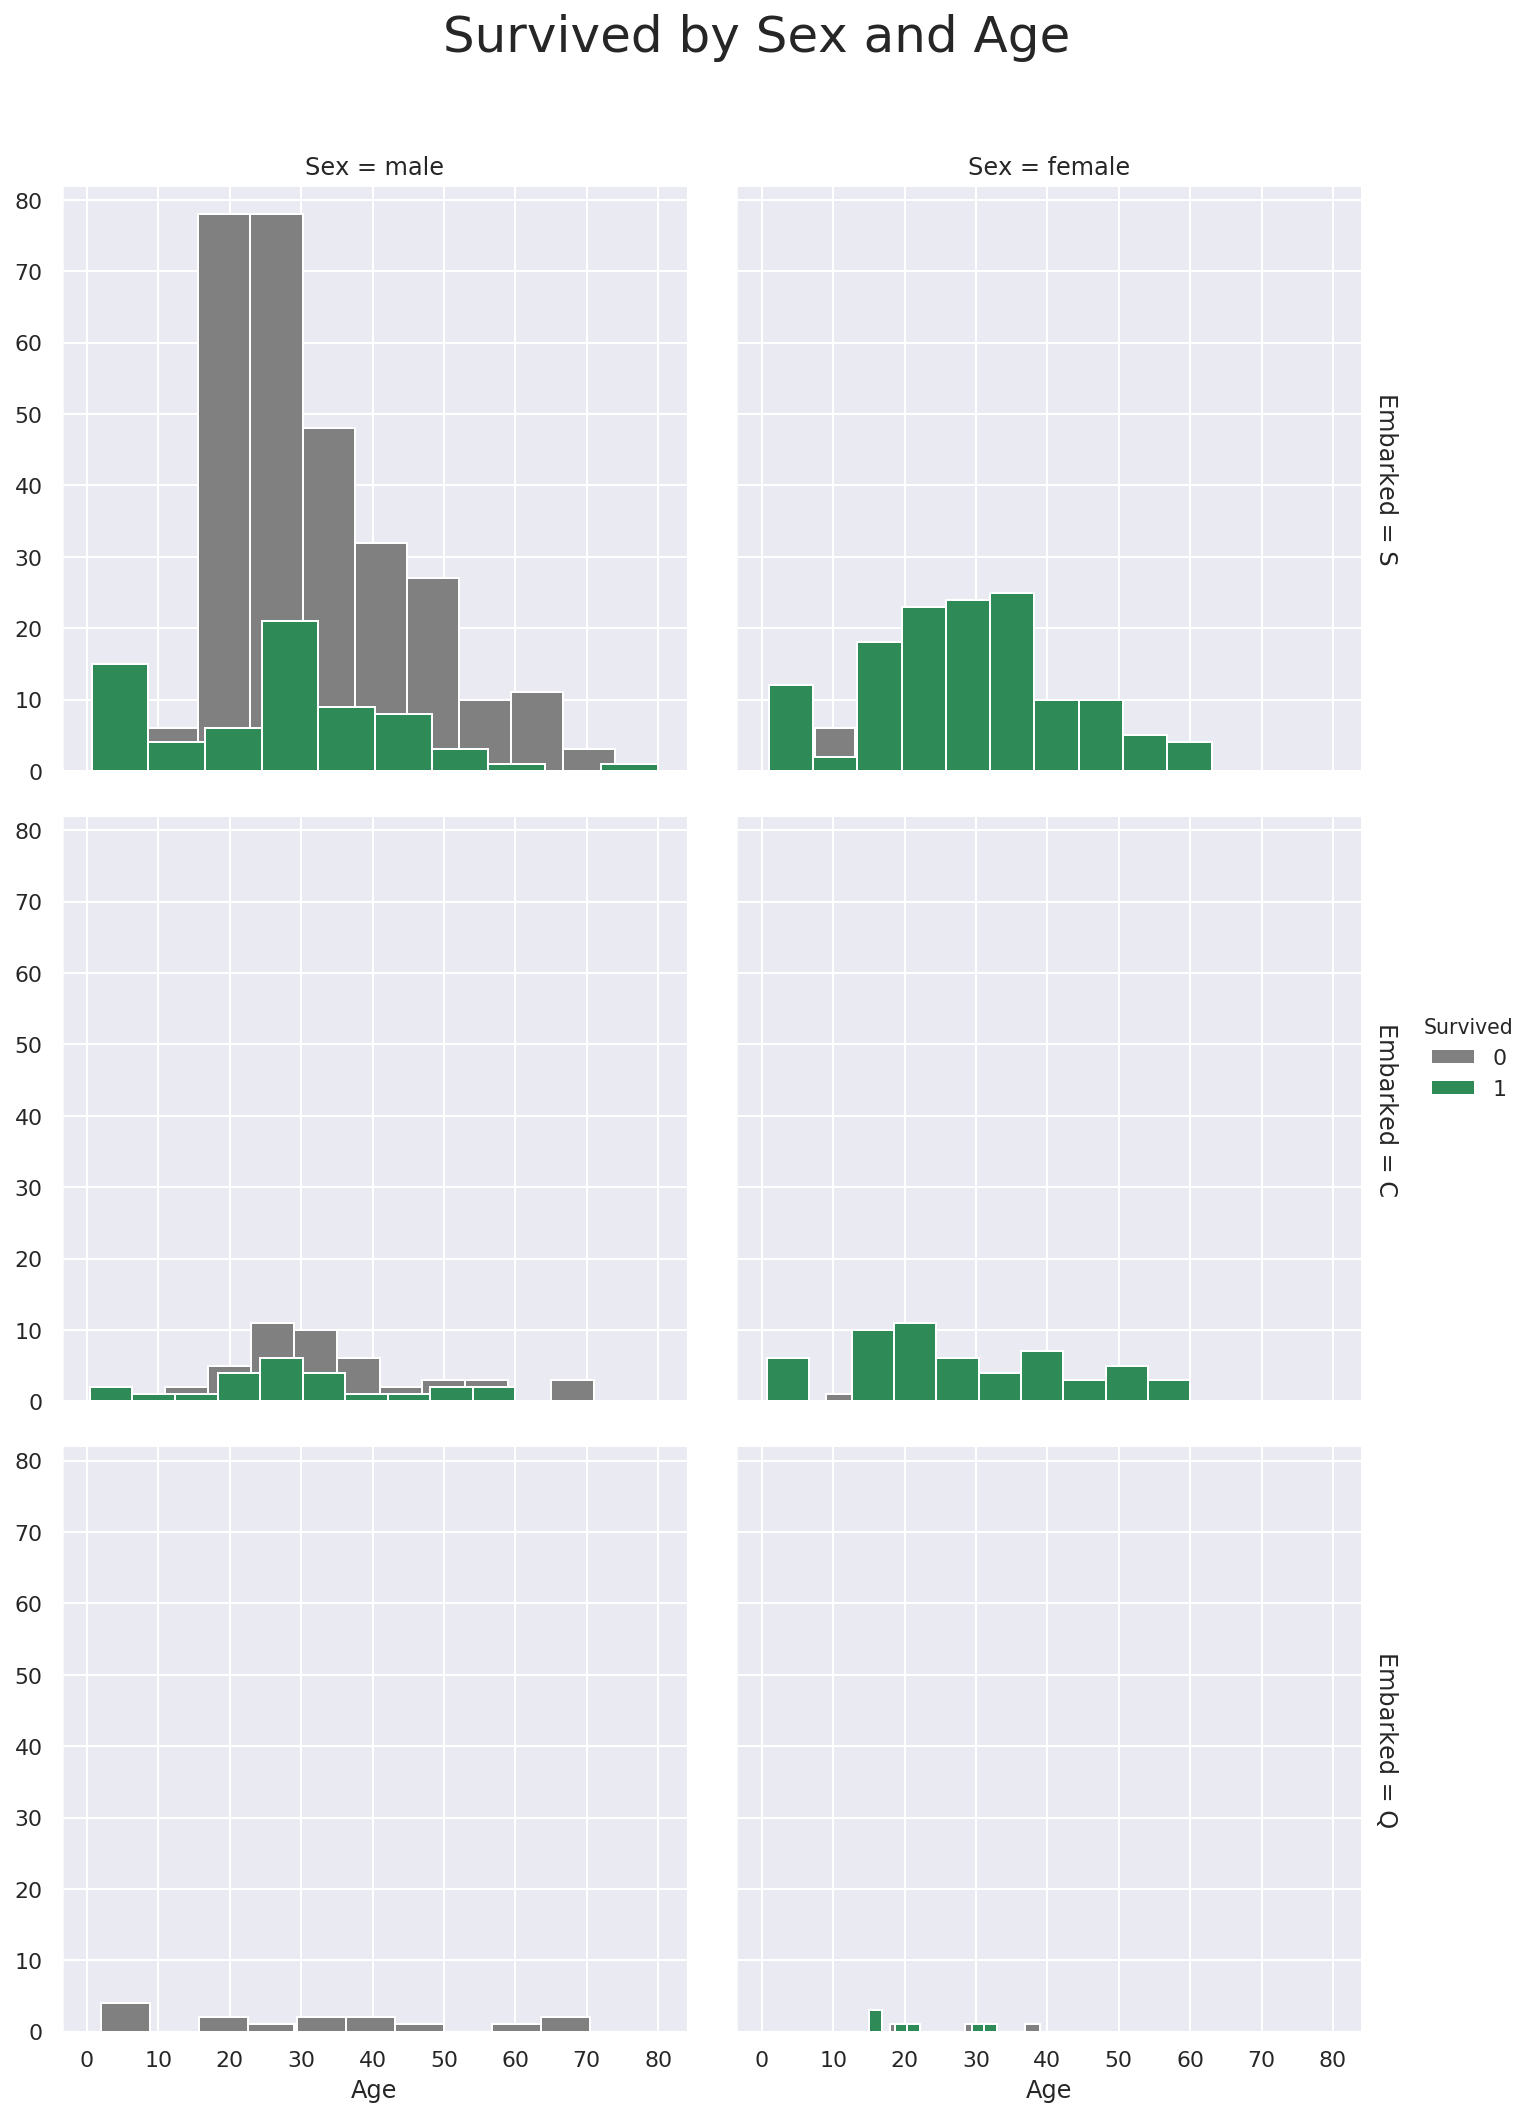

In [43]:
g = sns.FacetGrid(train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

In [44]:
####################################################################
Survived = train["Survived"]

In [45]:
train.drop("Survived",axis = 1, inplace = True)

In [46]:
df = pd.concat([train,test], ignore_index=False)

In [47]:
## Solution for Missing Value 

In [48]:
## Train data set Missing Value Columns Name - 
## Embarked 2
## Age      177
## Cabin    685

## Test data set Missing Value Columns Name 
## Age    86
## Cabin  32

## From here First we go solution of Missing value of Embarked because it Missing Value % is 0.22%
## Then For Age 
## Lastly Cabin

In [49]:
## Solution For Embarked 

#Embarked(Port of Embarkation)
    #C(Cherbourg)
    #Q(Queenstown) 
    #S(Southampton)
#Dichotomous(Nominal variable with only two categories)

In [50]:
df[df.Embarked.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [51]:
# From above Ouput we can see that Missing Value Have same Pclass Survived Sex Sibsp Parch Ticket Fare and Cabin 
## Attribtes Correlated with Embarked (on the basis of my Understanding ) form the dataset 
# P Class
# Cabin 
# Fare 

# So we can divide data set on the basis of Passenger class == 1 


In [52]:
df_pclass = df.loc[df['Pclass'] == 1]

In [53]:
print(df_pclass['Embarked'].value_counts())

S    177
C    141
Q      3
Name: Embarked, dtype: int64


In [54]:
# from above o/p we can see that Q count is very less for the Pclass == 1 so we ignore the Q 
# Now we divide train_pclass on the basis of fare between S and c 

In [55]:
df_pclass_E_S = df_pclass.loc[df_pclass['Embarked'] == 'S']

In [56]:
df_pclass_E_C = df_pclass.loc[df_pclass['Embarked'] == 'C']

In [57]:
df_pclass_E_S.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


In [58]:
df_pclass_E_C.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
30,31,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
31,32,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
34,35,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
52,53,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


In [59]:
# From Above two o/p we Can see that Median of S for fair = 50 and E for fair = approx 80 
# For better clearity 

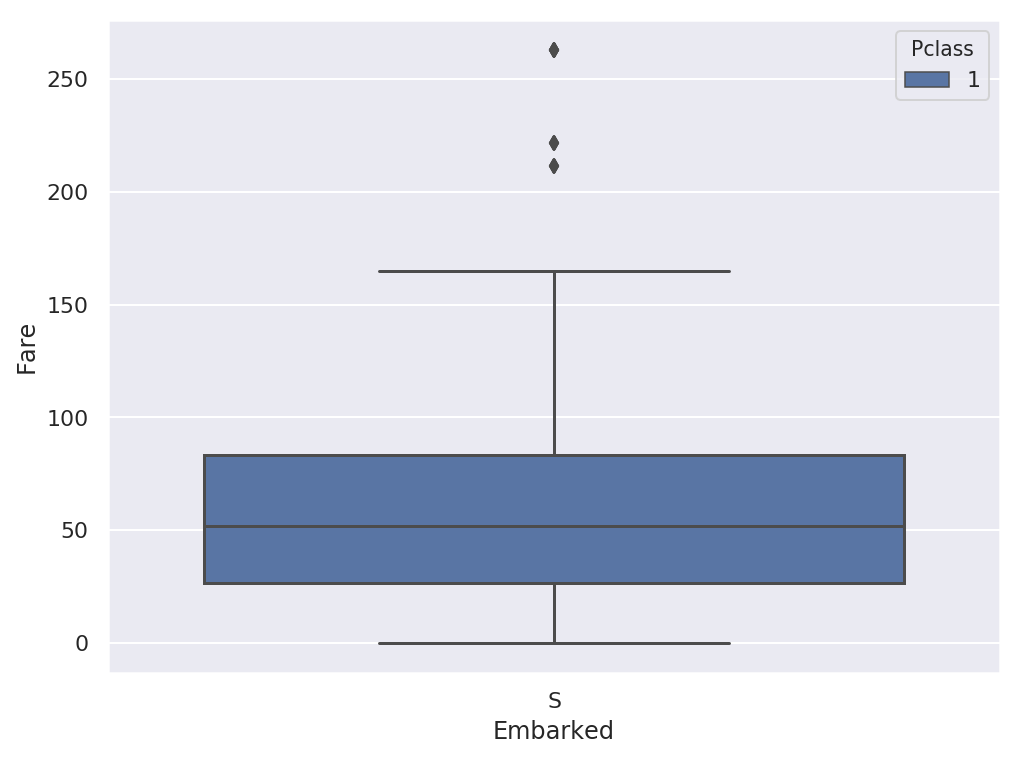

In [60]:
fig, ax = plt.subplots(figsize=(8,6),ncols=1)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data = df_pclass_E_S);
fig.show()

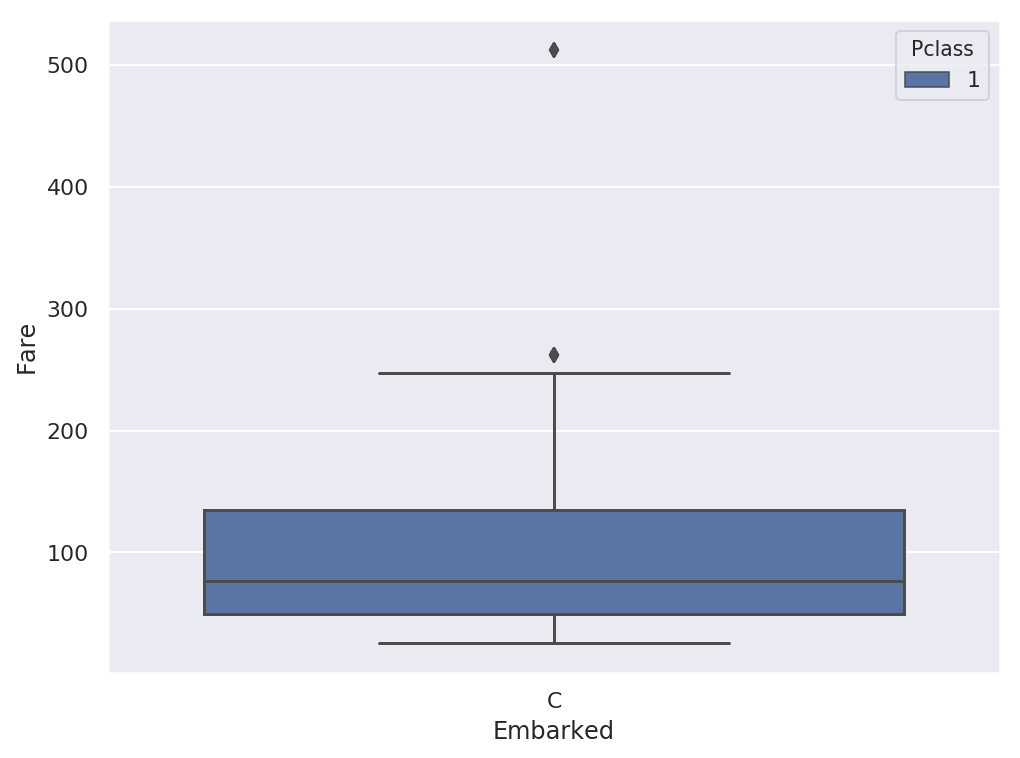

In [61]:
fig, ax = plt.subplots(figsize=(8,6),ncols=1)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data = df_pclass_E_C);
fig.show()

In [62]:
df_pclass_E_S["Fare"].mean()

72.14809435028249

In [63]:
df_pclass_E_S["Fare"].median()

52.0

In [64]:
df_pclass_E_C["Fare"].mean()

106.84533049645385

In [65]:
df_pclass_E_C["Fare"].median()

76.7292

In [66]:
# Now the Qestion arises that can I go for the Mean or Median imputation 
# if we go for Mean imputation we select S For missing value because S mean fare is close to 80
# if we go for Median imputation we select C For missing value because C median fare is close to 80
# For the Answer of this question we have to see the data distribution

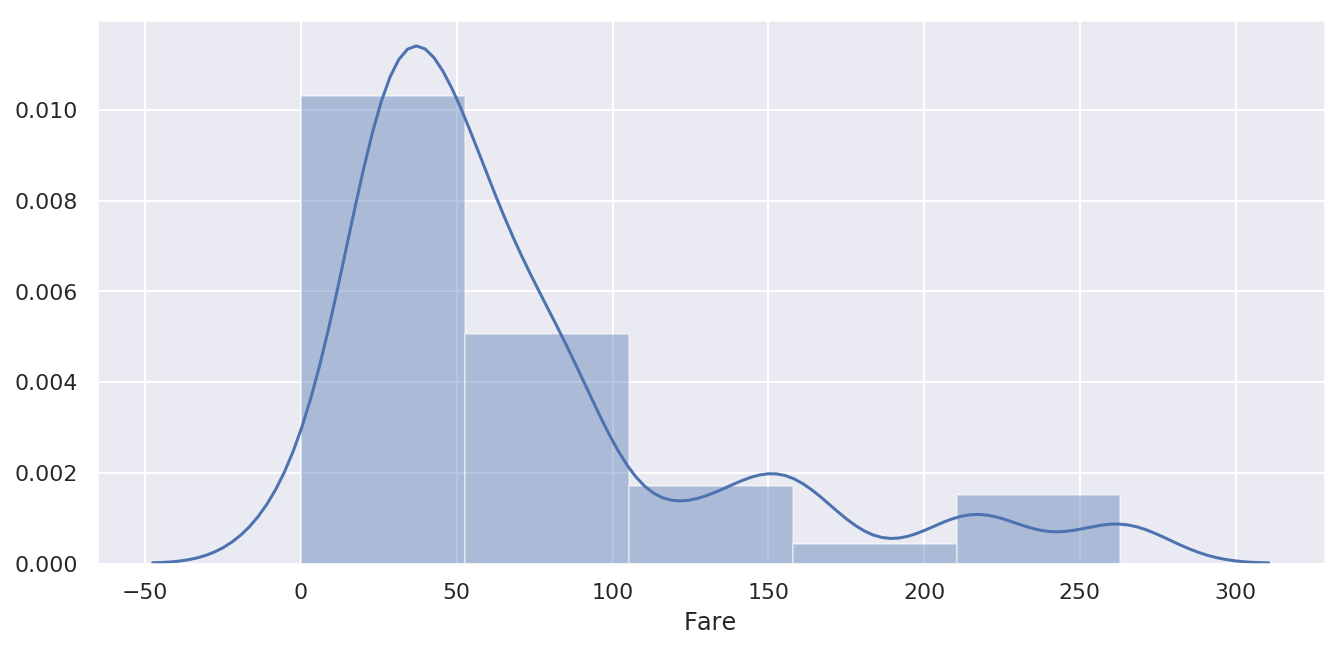

In [67]:
plt.subplots(figsize = (11,5),)
sns.distplot(df_pclass_E_S.Fare, bins = 5, kde = True, rug = False, norm_hist=True);

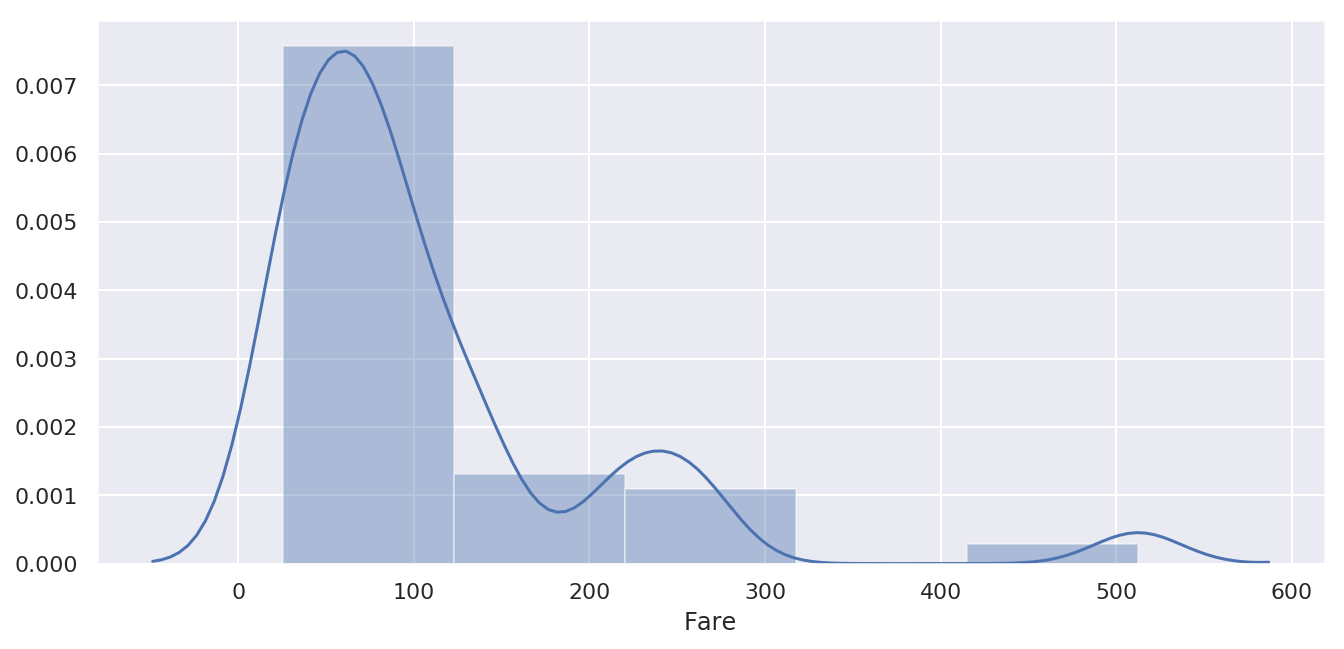

In [68]:
plt.subplots(figsize = (11,5),)
sns.distplot(df_pclass_E_C.Fare, bins = 5, kde = True, rug = False, norm_hist=True);

In [69]:
# We can se that data is Right Skewed we will go for median imputaion for missing Value 
# So ans is C for the Missing value

In [70]:
df.Embarked.fillna("C", inplace=True)

In [71]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
## Missing Value In terms of Percentage for train data set

Missing_Value_df = df.isnull().sum().sort_values(ascending = False)
percentage_df = round(df.isnull().sum().sort_values(ascending = False)/len(train)*100, 2)


pd.concat([Missing_Value_df, percentage_df], axis = 1,keys= ["Missing_Value_df"," percentage_df"])


,Missing_Value_df,percentage_df
Cabin,1014,113.80
Age,263,29.52
Fare,1,0.11
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [73]:
## Now you can see that Embarked has no missing value 
## Second changle is filling Missing Value of Age 
## We can see that Age Attribute consits NA value in both train and test data set so now we have to concate both datafram in single datafram
## I was facing problem when i was applying Vstack on train and test datafram so i have manually add a coloumn name in train data set "survived" for tempory basis  


In [74]:
#Sex
    #Female
    #Male
#Ordinal(variables that have two or more categories just like nominal variables. 
#Only the categories can also be ordered or ranked.


In [75]:
# Affecting Factor For Age Missing Value 
# I am not able to determine which Attributes effect Age Attribute 
# So for Filling Missing Value we have to do some Feature Engg so that we can find some new attribute 

In [76]:
# if we closely look all attribute we can find that Name column consist of Titel  

In [77]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
df["titel"] = [i.split('.')[0] for i in df.Name]
df["titel"].head()

0         Braund, Mr
1       Cumings, Mrs
2    Heikkinen, Miss
3      Futrelle, Mrs
4          Allen, Mr
Name: titel, dtype: object

In [79]:
df["Titel"] = [i.split(',')[1] for i in df.titel]
df["Titel"].head()

0       Mr
1      Mrs
2     Miss
3      Mrs
4       Mr
Name: Titel, dtype: object

In [80]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titel,Titel
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr",Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs",Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss",Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mrs",Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr",Mr


In [81]:
print(df["Titel"].value_counts())

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Dona              1
 Lady              1
 Sir               1
 Mme               1
 Capt              1
 the Countess      1
 Don               1
 Jonkheer          1
Name: Titel, dtype: int64


In [82]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titel,Titel
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr",Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs",Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss",Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Futrelle, Mrs",Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Allen, Mr",Mr


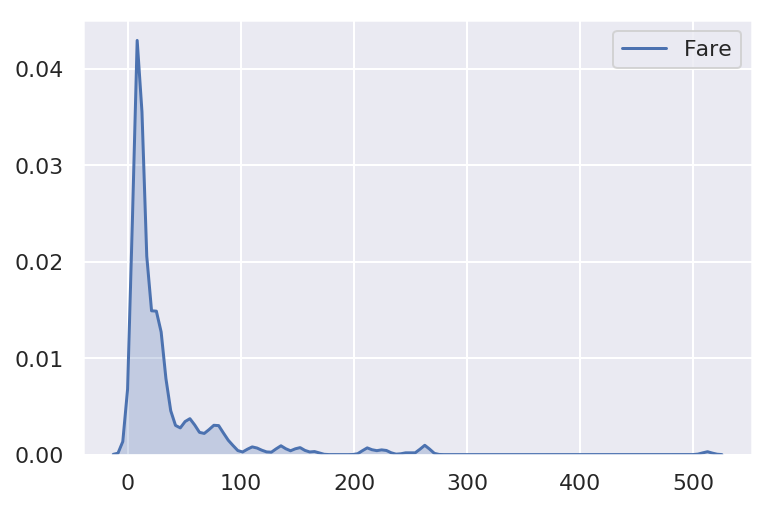

In [83]:
# density plot with shade
sns.kdeplot(df['Fare'], shade=True)
#sns.plt.show()


In [84]:
df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [85]:
df.Age.dtypes

dtype('float64')

In [86]:
Age = df[["Age"]]

In [87]:
Age.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [88]:
Age =  Age.fillna(0)

In [89]:
Age = pd.DataFrame(Age.Age.astype(int))

In [90]:
Age.head()

,Age
0,22
1,38
2,26
3,35
4,35


In [91]:
df.drop("Age",axis = 1, inplace = True)

In [92]:
df_new = pd.concat([Age,df],axis=1)

In [93]:
df_new.dtypes

Age              int64
PassengerId      int64
Pclass           int64
Name            object
Sex             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
titel           object
Titel           object
dtype: object

In [94]:
df_new.groupby("Titel")["Age"].transform("median")

0      25.0
1      33.0
2      18.0
3      33.0
4      25.0
5      25.0
6      25.0
7       4.0
8      33.0
9      33.0
10     18.0
11     18.0
12     25.0
13     25.0
14     18.0
15     33.0
16      4.0
17     25.0
18     33.0
19     33.0
20     25.0
21     25.0
22     18.0
23     25.0
24     18.0
25     33.0
26     25.0
27     25.0
28     18.0
29     25.0
       ... 
388    25.0
389     4.0
390    25.0
391    33.0
392     4.0
393    25.0
394    25.0
395    33.0
396    25.0
397    33.0
398    25.0
399    25.0
400    18.0
401    25.0
402    18.0
403    25.0
404    25.0
405    25.0
406    25.0
407    25.0
408    18.0
409    18.0
410    18.0
411    33.0
412    18.0
413    25.0
414    39.0
415    25.0
416    25.0
417     4.0
Name: Age, Length: 1309, dtype: float64

In [95]:
df_new.head()

,Age,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titel,Titel
0,22,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr",Mr
1,38,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs",Mrs
2,26,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss",Miss
3,35,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,"Futrelle, Mrs",Mrs
4,35,5,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,"Allen, Mr",Mr


In [96]:
## Missing Value In terms of Percentage for train data set

Missing_Value = df_new.isnull().sum().sort_values(ascending = False)
percentage = round(df_new.isnull().sum().sort_values(ascending = False)/len(train)*100, 2)

pd.concat([Missing_Value, percentage], axis = 1,keys= ["Missing_Value"," percentage"])


,Missing_Value,percentage
Cabin,1014,113.80
Fare,1,0.11
Titel,0,0.00
titel,0,0.00
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00


In [97]:
## Now Age Missing Value Has been Full filled

In [98]:
## For cabin we have Make a new Attribute Actual Fare 

In [99]:
df_new['Family_size'] = df.SibSp + df.Parch+1

In [100]:
df_new.head()

,Age,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titel,Titel,Family_size
0,22,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr",Mr,2
1,38,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs",Mrs,2
2,26,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss",Miss,1
3,35,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,"Futrelle, Mrs",Mrs,2
4,35,5,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,"Allen, Mr",Mr,1


In [101]:
df_new["Actual_Fare"]  = (df_new.Fare)/(df_new.Family_size)

In [102]:
df_new.head()

,Age,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titel,Titel,Family_size,Actual_Fare
0,22,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr",Mr,2,3.62500
1,38,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs",Mrs,2,35.64165
2,26,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss",Miss,1,7.92500
3,35,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,"Futrelle, Mrs",Mrs,2,26.55000
4,35,5,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,"Allen, Mr",Mr,1,8.05000


In [103]:
df_new.isnull().sum()

Age               0
PassengerId       0
Pclass            0
Name              0
Sex               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          0
titel             0
Titel             0
Family_size       0
Actual_Fare       1
dtype: int64

In [104]:
## Assign all the null values to N For Cabin
df_new.Cabin.fillna("N", inplace=True)


In [105]:
## Missing Value In terms of Percentage for train data set

Missing_Value = df_new.isnull().sum().sort_values(ascending = False)
percentage = round(df_new.isnull().sum().sort_values(ascending = False)/len(train)*100, 2)


pd.concat([Missing_Value, percentage], axis = 1,keys= ["Missing_Value"," percentage"])


,Missing_Value,percentage
Actual_Fare,1,0.11
Fare,1,0.11
Family_size,0,0.00
Titel,0,0.00
titel,0,0.00
Embarked,0,0.00
Cabin,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00


In [106]:
df_new.dtypes

Age              int64
PassengerId      int64
Pclass           int64
Name            object
Sex             object
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
titel           object
Titel           object
Family_size      int64
Actual_Fare    float64
dtype: object

In [107]:
df_new.Cabin = [i[0] for i in df_new.Cabin]

In [108]:
df_new.Cabin

0      N
1      C
2      N
3      C
4      N
5      N
6      E
7      N
8      N
9      N
10     G
11     C
12     N
13     N
14     N
15     N
16     N
17     N
18     N
19     N
20     N
21     D
22     N
23     A
24     N
25     N
26     N
27     C
28     N
29     N
      ..
388    N
389    N
390    B
391    D
392    N
393    N
394    N
395    C
396    N
397    B
398    N
399    N
400    C
401    N
402    N
403    N
404    D
405    D
406    N
407    C
408    N
409    N
410    N
411    C
412    N
413    N
414    C
415    N
416    N
417    N
Name: Cabin, Length: 1309, dtype: object

In [109]:
df_new.Cabin.head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [110]:
print(df_new['Cabin'].value_counts())

N    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64


In [111]:
df_Pclass_1 = df_new[df_new.Pclass == 1]

In [112]:
df_Pclass_1["Cabin"].value_counts()

C    94
N    67
B    65
D    40
E    34
A    22
T     1
Name: Cabin, dtype: int64

In [113]:
With_N_pclass_1 = df_Pclass_1[ df_Pclass_1.Cabin == "N"] 

In [114]:
Without_N_pclass_1 = df_Pclass_1[ df_Pclass_1.Cabin != "N"] 

In [115]:
g = df_Pclass_1 .groupby("Cabin")

In [116]:
fare_1 = pd.DataFrame(g.Actual_Fare.mean().sort_values())

In [117]:
df_Pclass_2 = df_new[df_new.Pclass == 2]

In [118]:
df_Pclass_2["Cabin"].value_counts()

N    254
F     13
D      6
E      4
Name: Cabin, dtype: int64

In [119]:
With_N_pclass_2 = df_Pclass_2[ df_Pclass_2.Cabin == "N"] 

In [120]:
g1 = df_Pclass_2 .groupby("Cabin")

In [121]:
fare_2 = pd.DataFrame(g1.Actual_Fare.mean().sort_values())

In [122]:
df_Pclass_3 = df_new[df_new.Pclass == 3]

In [123]:
df_Pclass_3["Cabin"].value_counts()

N    693
F      8
G      5
E      3
Name: Cabin, dtype: int64

In [124]:
With_N_pclass_3 = df_Pclass_3[ df_Pclass_3.Cabin == "N"] 

In [125]:
Without_N_pclass_3 = df_Pclass_3[ df_Pclass_3.Cabin != "N"] 

In [126]:
g2 = df_Pclass_3 .groupby("Cabin")

In [127]:
fare_3 =pd.DataFrame(g2.Actual_Fare.mean().sort_values())

In [128]:
fare = fare_1,fare_2,fare_3

In [129]:
fare

(       Actual_Fare
 Cabin             
 A        31.608805
 T        35.500000
 D        35.518734
 E        37.722550
 C        59.303370
 N        59.968198
 B        68.796005,        Actual_Fare
 Cabin             
 F        10.423077
 E        11.587500
 N        13.523949
 D        13.595833,        Actual_Fare
 Cabin             
 G         5.083750
 E         6.841667
 F         7.532646
 N         7.998232)

In [130]:
N = df_new[df_new.Cabin == "N"]

without_N = df_new[df_new.Cabin != "N"]

df_new.groupby("Cabin")['Fare'].mean().sort_values()


Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [131]:
def cabin_estimator(i):
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

In [132]:
##applying cabin estimator function. 
N['Cabin'] = N.Fare.apply(lambda x: cabin_estimator(x))


In [133]:
df = pd.concat([N, without_N], axis=0)


In [134]:
## Missing Value In terms of Percentage for train data set

Missing_Value = df.isnull().sum().sort_values(ascending = False)
percentage = round(df.isnull().sum().sort_values(ascending = False)/len(train)*100, 2)


pd.concat([Missing_Value, percentage], axis = 1,keys= ["Missing_Value"," percentage"])


,Missing_Value,percentage
Actual_Fare,1,0.11
Fare,1,0.11
Family_size,0,0.00
Titel,0,0.00
titel,0,0.00
Embarked,0,0.00
Cabin,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00


In [135]:
df = df.dropna(axis = 0, how ='any') 

In [136]:
## Missing Value In terms of Percentage for train data set

Missing_Value = df.isnull().sum().sort_values(ascending = False)
percentage = round(df.isnull().sum().sort_values(ascending = False)/len(train)*100, 2)


pd.concat([Missing_Value, percentage], axis = 1,keys= ["Missing_Value"," percentage"])


,Missing_Value,percentage
Actual_Fare,0,0.0
Family_size,0,0.0
Titel,0,0.0
titel,0,0.0
Embarked,0,0.0
Cabin,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0


In [137]:
## Droping Unwanted Attribute

In [138]:
df.head()

,Age,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,titel,Titel,Family_size,Actual_Fare
0,22,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,G,S,"Braund, Mr",Mr,2,3.6250
2,26,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,G,S,"Heikkinen, Miss",Miss,1,7.9250
4,35,5,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,G,S,"Allen, Mr",Mr,1,8.0500
5,0,6,3,"Moran, Mr. James",male,0,0,330877,8.4583,G,Q,"Moran, Mr",Mr,1,8.4583
7,2,8,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,F,S,"Palsson, Master",Master,5,4.2150


In [139]:
df = df.drop("Ticket",axis = 1)
df = df.drop("Fare", axis =1)

In [140]:
df.head() 

,Age,PassengerId,Pclass,Name,Sex,SibSp,Parch,Cabin,Embarked,titel,Titel,Family_size,Actual_Fare
0,22,1,3,"Braund, Mr. Owen Harris",male,1,0,G,S,"Braund, Mr",Mr,2,3.6250
2,26,3,3,"Heikkinen, Miss. Laina",female,0,0,G,S,"Heikkinen, Miss",Miss,1,7.9250
4,35,5,3,"Allen, Mr. William Henry",male,0,0,G,S,"Allen, Mr",Mr,1,8.0500
5,0,6,3,"Moran, Mr. James",male,0,0,G,Q,"Moran, Mr",Mr,1,8.4583
7,2,8,3,"Palsson, Master. Gosta Leonard",male,3,1,F,S,"Palsson, Master",Master,5,4.2150


In [141]:
## Feature Eng 

In [142]:
def Age_estimator(i):
    a = 0
    if i<1:
        a = "Infant"
    elif i>=1 and i<4:
        a = "Baby"
    elif i>=5 and i<18:
        a = "Child"
    elif i>=19 and i<25:
        a = "Young"
    elif i>= 26 and i<40:
        a = "Mid Age Adult"
    elif i>= 41 and i<54:
        a = "Adult"
    else:
        a = "Senior Citizen"
    return a

In [143]:
df['Age_estimator'] = df['Age'].map( Age_estimator)

In [144]:
df.head()

,Age,PassengerId,Pclass,Name,Sex,SibSp,Parch,Cabin,Embarked,titel,Titel,Family_size,Actual_Fare,Age_estimator
0,22,1,3,"Braund, Mr. Owen Harris",male,1,0,G,S,"Braund, Mr",Mr,2,3.6250,Young
2,26,3,3,"Heikkinen, Miss. Laina",female,0,0,G,S,"Heikkinen, Miss",Miss,1,7.9250,Mid Age Adult
4,35,5,3,"Allen, Mr. William Henry",male,0,0,G,S,"Allen, Mr",Mr,1,8.0500,Mid Age Adult
5,0,6,3,"Moran, Mr. James",male,0,0,G,Q,"Moran, Mr",Mr,1,8.4583,Infant
7,2,8,3,"Palsson, Master. Gosta Leonard",male,3,1,F,S,"Palsson, Master",Master,5,4.2150,Baby


In [145]:
df['Name_Length']=[len(i) for i in df.Name] 

In [146]:
df.head()

,Age,PassengerId,Pclass,Name,Sex,SibSp,Parch,Cabin,Embarked,titel,Titel,Family_size,Actual_Fare,Age_estimator,Name_Length
0,22,1,3,"Braund, Mr. Owen Harris",male,1,0,G,S,"Braund, Mr",Mr,2,3.6250,Young,23
2,26,3,3,"Heikkinen, Miss. Laina",female,0,0,G,S,"Heikkinen, Miss",Miss,1,7.9250,Mid Age Adult,22
4,35,5,3,"Allen, Mr. William Henry",male,0,0,G,S,"Allen, Mr",Mr,1,8.0500,Mid Age Adult,24
5,0,6,3,"Moran, Mr. James",male,0,0,G,Q,"Moran, Mr",Mr,1,8.4583,Infant,16
7,2,8,3,"Palsson, Master. Gosta Leonard",male,3,1,F,S,"Palsson, Master",Master,5,4.2150,Baby,30


In [147]:
def Name_length_map(size):
    a = ''
    if size <= 20:
        a = "Short"
    elif size <= 30:
        a = "Medium"
    elif size <= 40:
        a = "Large"    
    else :
        a = "Long"
    return a

In [148]:
df["Name_length_map"] = df['Name_Length'].map(Name_length_map)

In [149]:
df.head()

,Age,PassengerId,Pclass,Name,Sex,SibSp,Parch,Cabin,Embarked,titel,Titel,Family_size,Actual_Fare,Age_estimator,Name_Length,Name_length_map
0,22,1,3,"Braund, Mr. Owen Harris",male,1,0,G,S,"Braund, Mr",Mr,2,3.6250,Young,23,Medium
2,26,3,3,"Heikkinen, Miss. Laina",female,0,0,G,S,"Heikkinen, Miss",Miss,1,7.9250,Mid Age Adult,22,Medium
4,35,5,3,"Allen, Mr. William Henry",male,0,0,G,S,"Allen, Mr",Mr,1,8.0500,Mid Age Adult,24,Medium
5,0,6,3,"Moran, Mr. James",male,0,0,G,Q,"Moran, Mr",Mr,1,8.4583,Infant,16,Short
7,2,8,3,"Palsson, Master. Gosta Leonard",male,3,1,F,S,"Palsson, Master",Master,5,4.2150,Baby,30,Medium


In [150]:
df.Actual_Fare.describe()

count    1308.000000
mean       20.518215
std        35.774337
min         0.000000
25%         7.452767
50%         8.512483
75%        24.237500
max       512.329200
Name: Actual_Fare, dtype: float64

In [151]:
def Actual_Fare_Map(cost):
    a= ''
    if cost <= 5:
        a = 'Very_low'
    elif cost <= 15:
        a = 'low'
    elif cost <= 25:
        a = 'mid'
    elif cost <= 50:
        a = 'high'
    else:
        a = "very_high"
    return a

In [152]:
df["Actual_Fare_Map"] = df['Actual_Fare'].map(Actual_Fare_Map)

In [153]:
df.head()

,Age,PassengerId,Pclass,Name,Sex,SibSp,Parch,Cabin,Embarked,titel,Titel,Family_size,Actual_Fare,Age_estimator,Name_Length,Name_length_map,Actual_Fare_Map
0,22,1,3,"Braund, Mr. Owen Harris",male,1,0,G,S,"Braund, Mr",Mr,2,3.6250,Young,23,Medium,Very_low
2,26,3,3,"Heikkinen, Miss. Laina",female,0,0,G,S,"Heikkinen, Miss",Miss,1,7.9250,Mid Age Adult,22,Medium,low
4,35,5,3,"Allen, Mr. William Henry",male,0,0,G,S,"Allen, Mr",Mr,1,8.0500,Mid Age Adult,24,Medium,low
5,0,6,3,"Moran, Mr. James",male,0,0,G,Q,"Moran, Mr",Mr,1,8.4583,Infant,16,Short,low
7,2,8,3,"Palsson, Master. Gosta Leonard",male,3,1,F,S,"Palsson, Master",Master,5,4.2150,Baby,30,Medium,Very_low


In [154]:
print(df["Titel"].value_counts())

 Mr              756
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Mlle              2
 Major             2
 Ms                2
 Dona              1
 Lady              1
 Sir               1
 Mme               1
 Capt              1
 the Countess      1
 Don               1
 Jonkheer          1
Name: Titel, dtype: int64


In [155]:
## Dividing Titel 1) Master == Male child 2) Mr == Mid Age Adult 3) Dr == doctor 4) Rare == Major, Capt 5) Mrs Dona,lady,Mme,The countless,Mlle 
df["Titel"] = [i.replace('Sir', 'Mr') for i in df.Titel]
df["Titel"] = [i.replace('Don', 'Mr') for i in df.Titel]
df["Titel"] = [i.replace('Rev', 'Mr') for i in df.Titel]
df["Titel"] = [i.replace('Col', 'Mr') for i in df.Titel]
df["Titel"] = [i.replace('Sirs', 'Mr') for i in df.Titel]
df["Titel"] = [i.replace('Jonkheer', 'Mr') for i in df.Titel]
df["Titel"] = [i.replace('Major','Rare') for i in df.Titel]
df["Titel"] = [i.replace('Dona','Mrs') for i in df.Titel]
df["Titel"] = [i.replace('Lady','Mrs') for i in df.Titel]
df["Titel"] = [i.replace('Mlle','Mrs') for i in df.Titel]
df["Titel"] = [i.replace('Mme','Mrs' ) for i in df.Titel]
df["Titel"] = [i.replace('the Countess','Mrs' ) for i in df.Titel]
df["Titel"] = [i.replace('Mrs','Miss' ) for i in df.Titel]
df["Titel"] = [i.replace('Ms','Miss' ) for i in df.Titel]
df["Titel"] = [i.replace('Capt', 'Mr') for i in df.Titel]
df["Titel"] = [i.replace('Mra','Miss' ) for i in df.Titel]

In [156]:
print(df["Titel"].value_counts())

 Mr        772
 Miss      465
 Master     61
 Dr          8
 Rare        2
Name: Titel, dtype: int64


In [157]:
def Family_grouping(Size):
    a = ''
    if Size == 0:
        a = "Single"
    elif Size <= 4:
        a = "Small_Family"
    else:
        a = "Big_Family" 
    
    return a    

In [158]:
df["Family_Map"] = df["Family_size"].map(Family_grouping)

In [159]:
df.head()

,Age,PassengerId,Pclass,Name,Sex,SibSp,Parch,Cabin,Embarked,titel,Titel,Family_size,Actual_Fare,Age_estimator,Name_Length,Name_length_map,Actual_Fare_Map,Family_Map
0,22,1,3,"Braund, Mr. Owen Harris",male,1,0,G,S,"Braund, Mr",Mr,2,3.6250,Young,23,Medium,Very_low,Small_Family
2,26,3,3,"Heikkinen, Miss. Laina",female,0,0,G,S,"Heikkinen, Miss",Miss,1,7.9250,Mid Age Adult,22,Medium,low,Small_Family
4,35,5,3,"Allen, Mr. William Henry",male,0,0,G,S,"Allen, Mr",Mr,1,8.0500,Mid Age Adult,24,Medium,low,Small_Family
5,0,6,3,"Moran, Mr. James",male,0,0,G,Q,"Moran, Mr",Mr,1,8.4583,Infant,16,Short,low,Small_Family
7,2,8,3,"Palsson, Master. Gosta Leonard",male,3,1,F,S,"Palsson, Master",Master,5,4.2150,Baby,30,Medium,Very_low,Big_Family


In [160]:
df = pd.get_dummies(df, columns=['Titel',"Pclass", 'Cabin','Embarked','Name_length_map', 'Family_Map','Age_estimator','Actual_Fare_Map'], drop_first=False)

In [161]:
df.head()

,Age,PassengerId,Name,Sex,SibSp,Parch,titel,Family_size,Actual_Fare,Name_Length,...,Age_estimator_Child,Age_estimator_Infant,Age_estimator_Mid Age Adult,Age_estimator_Senior Citizen,Age_estimator_Young,Actual_Fare_Map_Very_low,Actual_Fare_Map_high,Actual_Fare_Map_low,Actual_Fare_Map_mid,Actual_Fare_Map_very_high
0,22,1,"Braund, Mr. Owen Harris",male,1,0,"Braund, Mr",2,3.6250,23,...,0,0,0,0,1,1,0,0,0,0
2,26,3,"Heikkinen, Miss. Laina",female,0,0,"Heikkinen, Miss",1,7.9250,22,...,0,0,1,0,0,0,0,1,0,0
4,35,5,"Allen, Mr. William Henry",male,0,0,"Allen, Mr",1,8.0500,24,...,0,0,1,0,0,0,0,1,0,0
5,0,6,"Moran, Mr. James",male,0,0,"Moran, Mr",1,8.4583,16,...,0,1,0,0,0,0,0,1,0,0
7,2,8,"Palsson, Master. Gosta Leonard",male,3,1,"Palsson, Master",5,4.2150,30,...,0,0,0,0,0,1,0,0,0,0


In [162]:
df.head()

,Age,PassengerId,Name,Sex,SibSp,Parch,titel,Family_size,Actual_Fare,Name_Length,...,Age_estimator_Child,Age_estimator_Infant,Age_estimator_Mid Age Adult,Age_estimator_Senior Citizen,Age_estimator_Young,Actual_Fare_Map_Very_low,Actual_Fare_Map_high,Actual_Fare_Map_low,Actual_Fare_Map_mid,Actual_Fare_Map_very_high
0,22,1,"Braund, Mr. Owen Harris",male,1,0,"Braund, Mr",2,3.6250,23,...,0,0,0,0,1,1,0,0,0,0
2,26,3,"Heikkinen, Miss. Laina",female,0,0,"Heikkinen, Miss",1,7.9250,22,...,0,0,1,0,0,0,0,1,0,0
4,35,5,"Allen, Mr. William Henry",male,0,0,"Allen, Mr",1,8.0500,24,...,0,0,1,0,0,0,0,1,0,0
5,0,6,"Moran, Mr. James",male,0,0,"Moran, Mr",1,8.4583,16,...,0,1,0,0,0,0,0,1,0,0
7,2,8,"Palsson, Master. Gosta Leonard",male,3,1,"Palsson, Master",5,4.2150,30,...,0,0,0,0,0,1,0,0,0,0


In [163]:
df.drop("Name",axis = 1,inplace = True)
df.drop("Family_size",axis = 1,inplace = True)
df.drop("Name_Length",axis = 1,inplace = True)
df.drop("titel",axis = 1,inplace = True)


In [164]:
df['Sex'].replace('female',0,inplace=True)
df['Sex'].replace('male',1,inplace=True)

In [165]:
headers = df.columns 

In [166]:
df.head()

,Age,PassengerId,Sex,SibSp,Parch,Actual_Fare,Titel_ Dr,Titel_ Master,Titel_ Miss,Titel_ Mr,...,Age_estimator_Child,Age_estimator_Infant,Age_estimator_Mid Age Adult,Age_estimator_Senior Citizen,Age_estimator_Young,Actual_Fare_Map_Very_low,Actual_Fare_Map_high,Actual_Fare_Map_low,Actual_Fare_Map_mid,Actual_Fare_Map_very_high
0,22,1,1,1,0,3.6250,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
2,26,3,0,0,0,7.9250,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,35,5,1,0,0,8.0500,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
5,0,6,1,0,0,8.4583,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
7,2,8,1,3,1,4.2150,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [167]:

## PassengerId helps us separate train and test. 
df.sort_values(by = 'PassengerId', inplace=True)

## Separating train and test from all_data. 
train = df[:891]

test = df[891:]



In [168]:
# Feature Scaling
## We will be using standardscaler to transform

In [169]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [170]:
## transforming "train_x"
train_x = pd.DataFrame(sc.fit_transform(train),columns=headers)

In [173]:
train_x.head()

,Age,PassengerId,Sex,SibSp,Parch,Actual_Fare,Titel_ Dr,Titel_ Master,Titel_ Miss,Titel_ Mr,...,Age_estimator_Child,Age_estimator_Infant,Age_estimator_Mid Age Adult,Age_estimator_Senior Citizen,Age_estimator_Young,Actual_Fare_Map_Very_low,Actual_Fare_Map_high,Actual_Fare_Map_low,Actual_Fare_Map_mid,Actual_Fare_Map_very_high
0,-0.101401,-1.730108,0.737695,0.432793,-0.473674,-0.454798,-0.088986,-0.216803,-0.735882,0.827230,...,-0.298734,-0.510152,-0.624512,-0.402081,2.325956,3.039964,-0.451723,-1.288294,-0.189859,-0.282843
1,0.808338,-1.726220,-1.355574,0.432793,-0.473674,0.438994,-0.088986,-0.216803,1.358913,-1.208853,...,-0.298734,-0.510152,1.601250,-0.402081,-0.429931,-0.328951,2.213744,-1.288294,-0.189859,-0.282843
2,0.126034,-1.722332,-1.355574,-0.474545,-0.473674,-0.334757,-0.088986,-0.216803,1.358913,-1.208853,...,-0.298734,-0.510152,1.601250,-0.402081,-0.429931,-0.328951,-0.451723,0.776220,-0.189859,-0.282843
3,0.637762,-1.718444,-1.355574,0.432793,-0.473674,0.185187,-0.088986,-0.216803,1.358913,-1.208853,...,-0.298734,-0.510152,1.601250,-0.402081,-0.429931,-0.328951,2.213744,-1.288294,-0.189859,-0.282843
4,0.637762,-1.714556,0.737695,-0.474545,-0.473674,-0.331267,-0.088986,-0.216803,-0.735882,0.827230,...,-0.298734,-0.510152,1.601250,-0.402081,-0.429931,-0.328951,-0.451723,0.776220,-0.189859,-0.282843


In [174]:
train_data = train_x
target = Survived

train_data = train_x.drop(['PassengerId'], axis=1)

train_data.shape, target.shape

((891, 42), (891,))

In [175]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [176]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [177]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.77777778 0.82022472 0.7752809  0.79775281 0.78651685 0.78651685
 0.76404494 0.82022472 0.69662921 0.82022472]


In [179]:
# kNN Score
round(np.mean(score)*100, 2)


78.45

In [180]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.75555556 0.80898876 0.73033708 0.78651685 0.76404494 0.7752809
 0.82022472 0.79775281 0.74157303 0.76404494]


In [181]:
# decision tree Score
round(np.mean(score)*100, 2)

77.44

In [182]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.86516854 0.79775281 0.84269663 0.78651685 0.82022472
 0.82022472 0.79775281 0.74157303 0.85393258]


In [184]:
# Random Forest Score
round(np.mean(score)*100, 2)

81.48

In [185]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.85393258 0.73033708 0.69662921 0.82022472 0.76404494
 0.79775281 0.7752809  0.73033708 0.76404494]


In [186]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

77.33

In [187]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.84444444 0.80898876 0.82022472 0.84269663 0.7752809  0.82022472
 0.82022472 0.84269663 0.79775281 0.87640449]


In [188]:
round(np.mean(score)*100,2)

82.49

In [189]:
pwd

'/home/v-nitin.gupta/Desktop/Titanic Solution'